In [2]:
#importing the data
import pandas as pd
df = pd.read_csv('C:/Users/sucha/Desktop/assignments/sales_data_with_discounts.csv')
df.head()


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include='number').columns.tolist()
numerical_columns


['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [9]:
# Calculate the mean, median, mode, and standard deviation for the numerical columns
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()
mode_values = df[numerical_columns].mode().iloc[0]
std_dev_values = df[numerical_columns].std()

summary_stats = pd.DataFrame({'Mean': mean_values, 'Median': median_values, 'Mode': mode_values, 'Standard Deviation': std_dev_values})
summary_stats

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


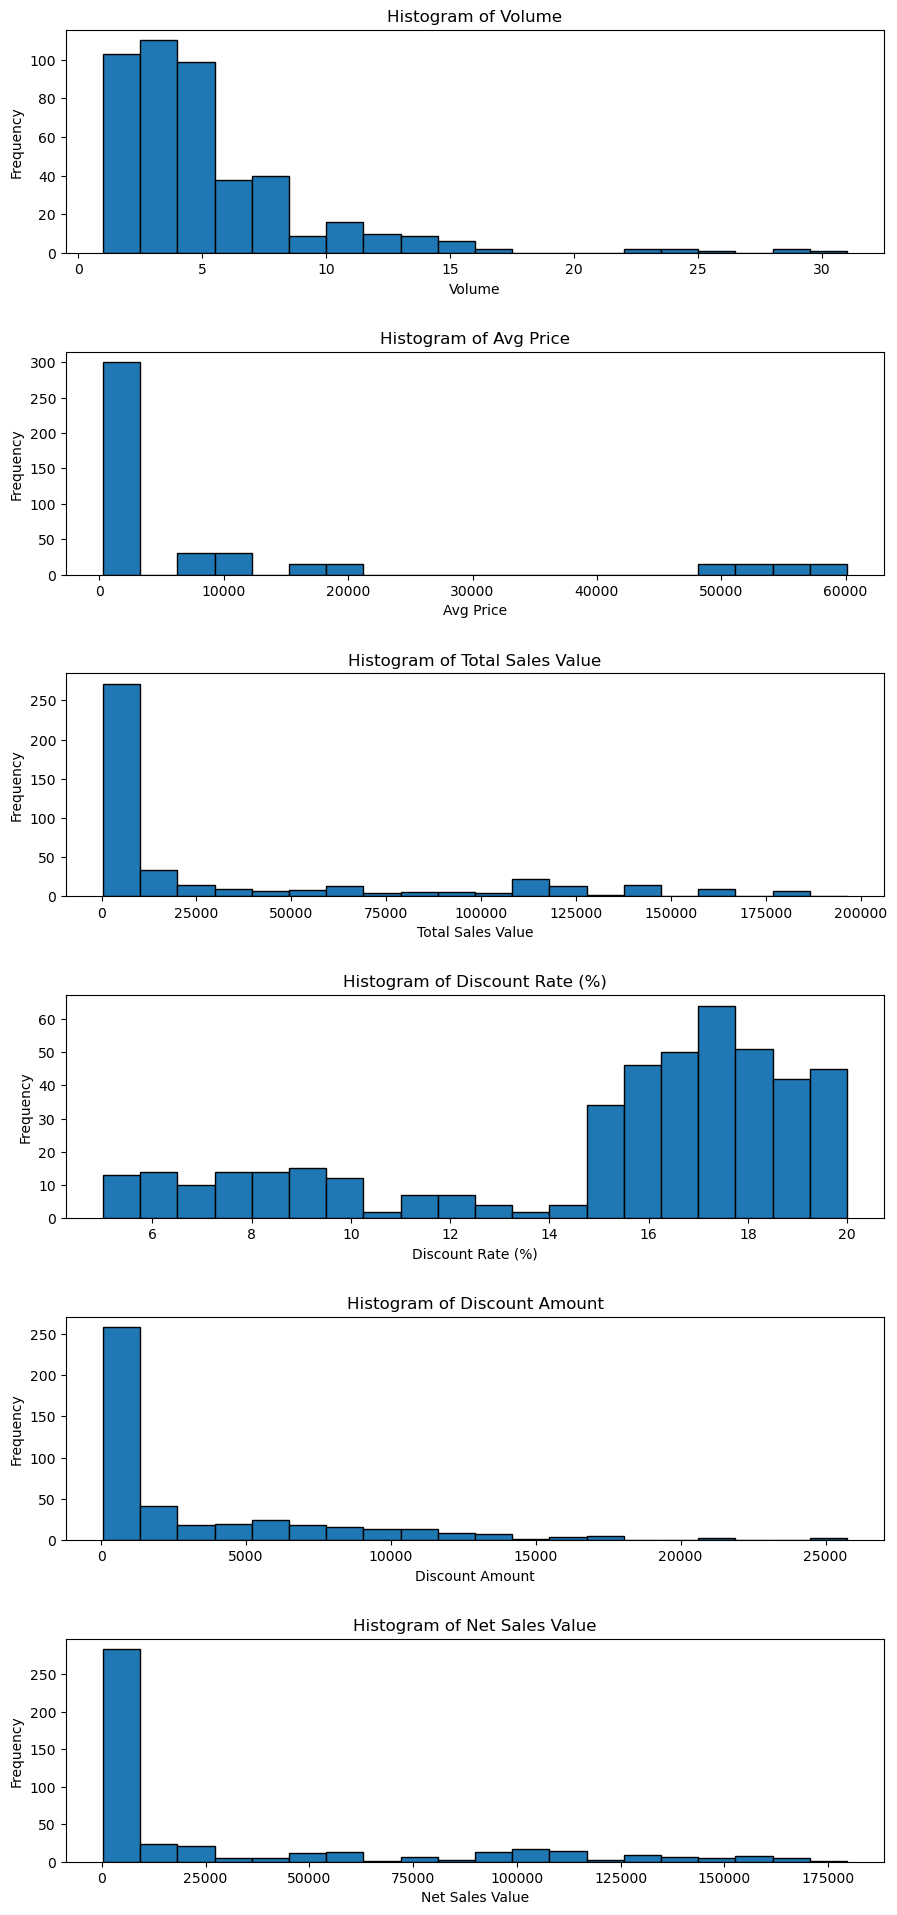

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for each numerical column
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Creating histograms
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    axes[i].hist(df[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Display the plots
plt.show()


In [12]:
# Calculate skewness and identify outliers for each numerical column
skewness = df[numerical_columns].skew()
outliers = {}

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

# Create a summary of skewness and outliers
distribution_analysis = pd.DataFrame({'Skewness': skewness,'Number of Outliers': [len(outliers[col]) for col in numerical_columns],'Outliers (Sample)': [outliers[col].head(5).tolist() for col in numerical_columns]})

# Code to display the DataFrame in a Jupyter notebook
from IPython.display import display

# Display the distribution analysis DataFrame
display(distribution_analysis)


,Skewness,Number of Outliers,Outliers (Sample)
Volume,2.731724,44,"[15, 13, 11, 29, 13]"
Avg Price,1.908873,60,"[49100, 54100, 55100, 60100, 49100]"
Total Sales Value,1.534729,36,"[181500, 147300, 180300, 133100, 147300]"
Discount Rate (%),-1.062294,45,"[6.935385325, 5.553719335858815, 7.410104486, ..."
Discount Amount,1.913038,24,"[21153.49881959317, 13594.039718999667, 17900...."
Net Sales Value,1.540822,35,"[160346.50118040683, 133705.96028100033, 16239..."


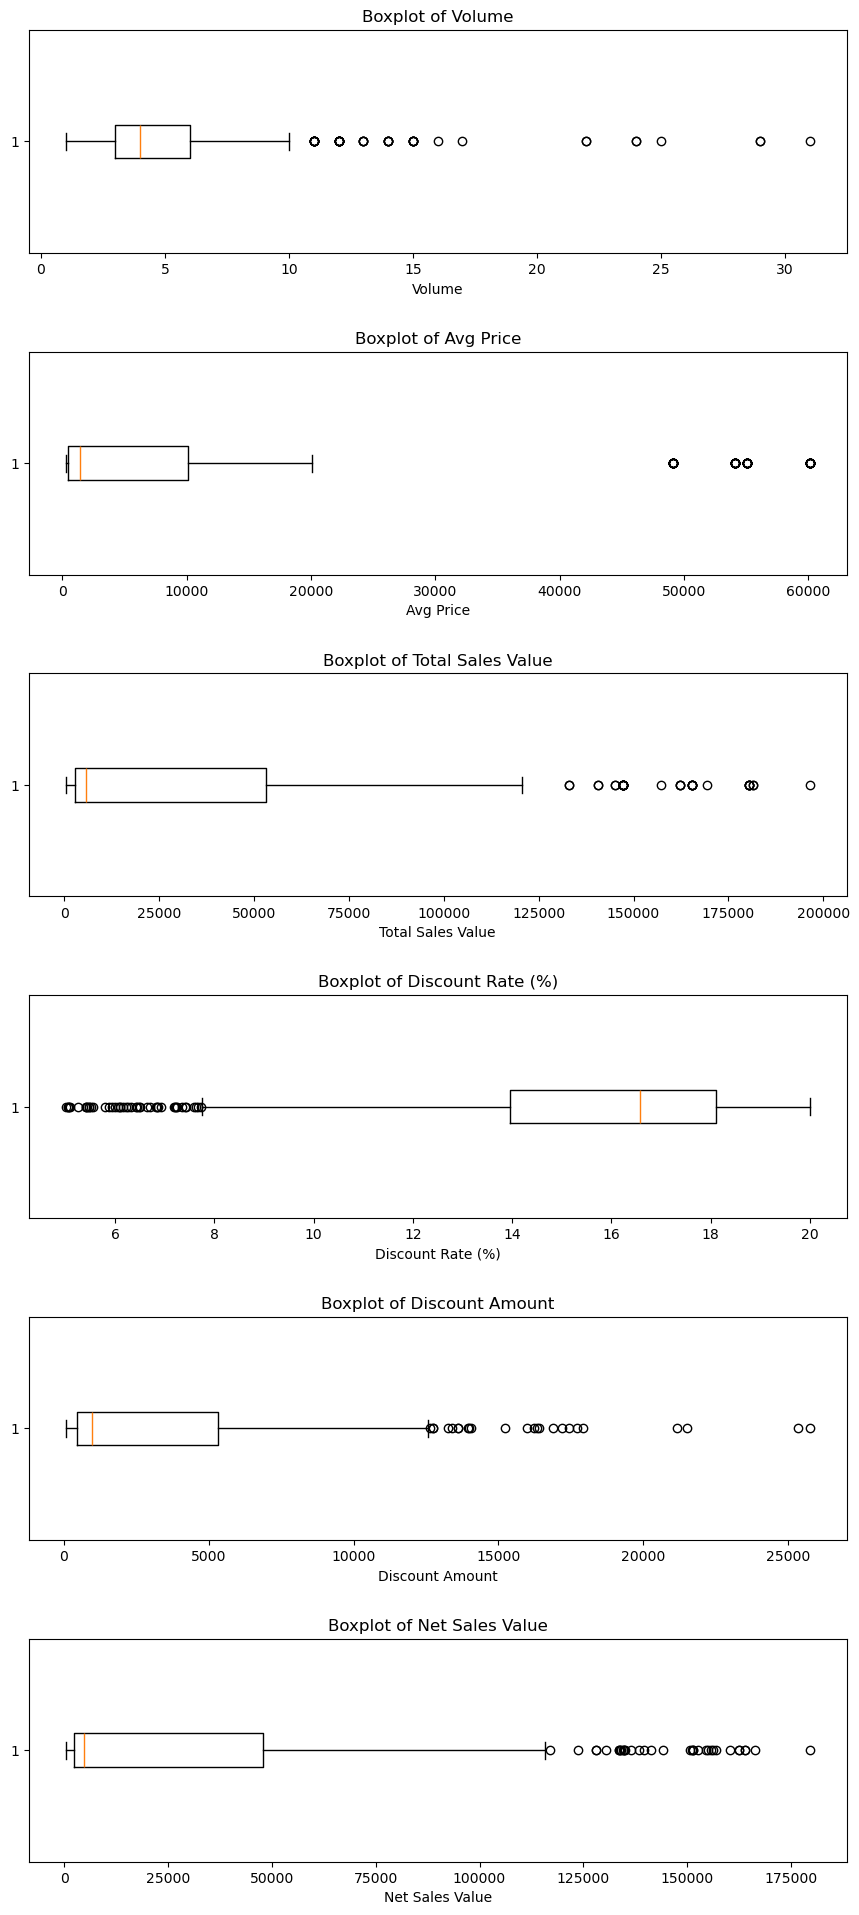

In [14]:
# Create boxplots for each numerical column to identify outliers
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column], vert=False)
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Display the boxplots
plt.show()


In [15]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

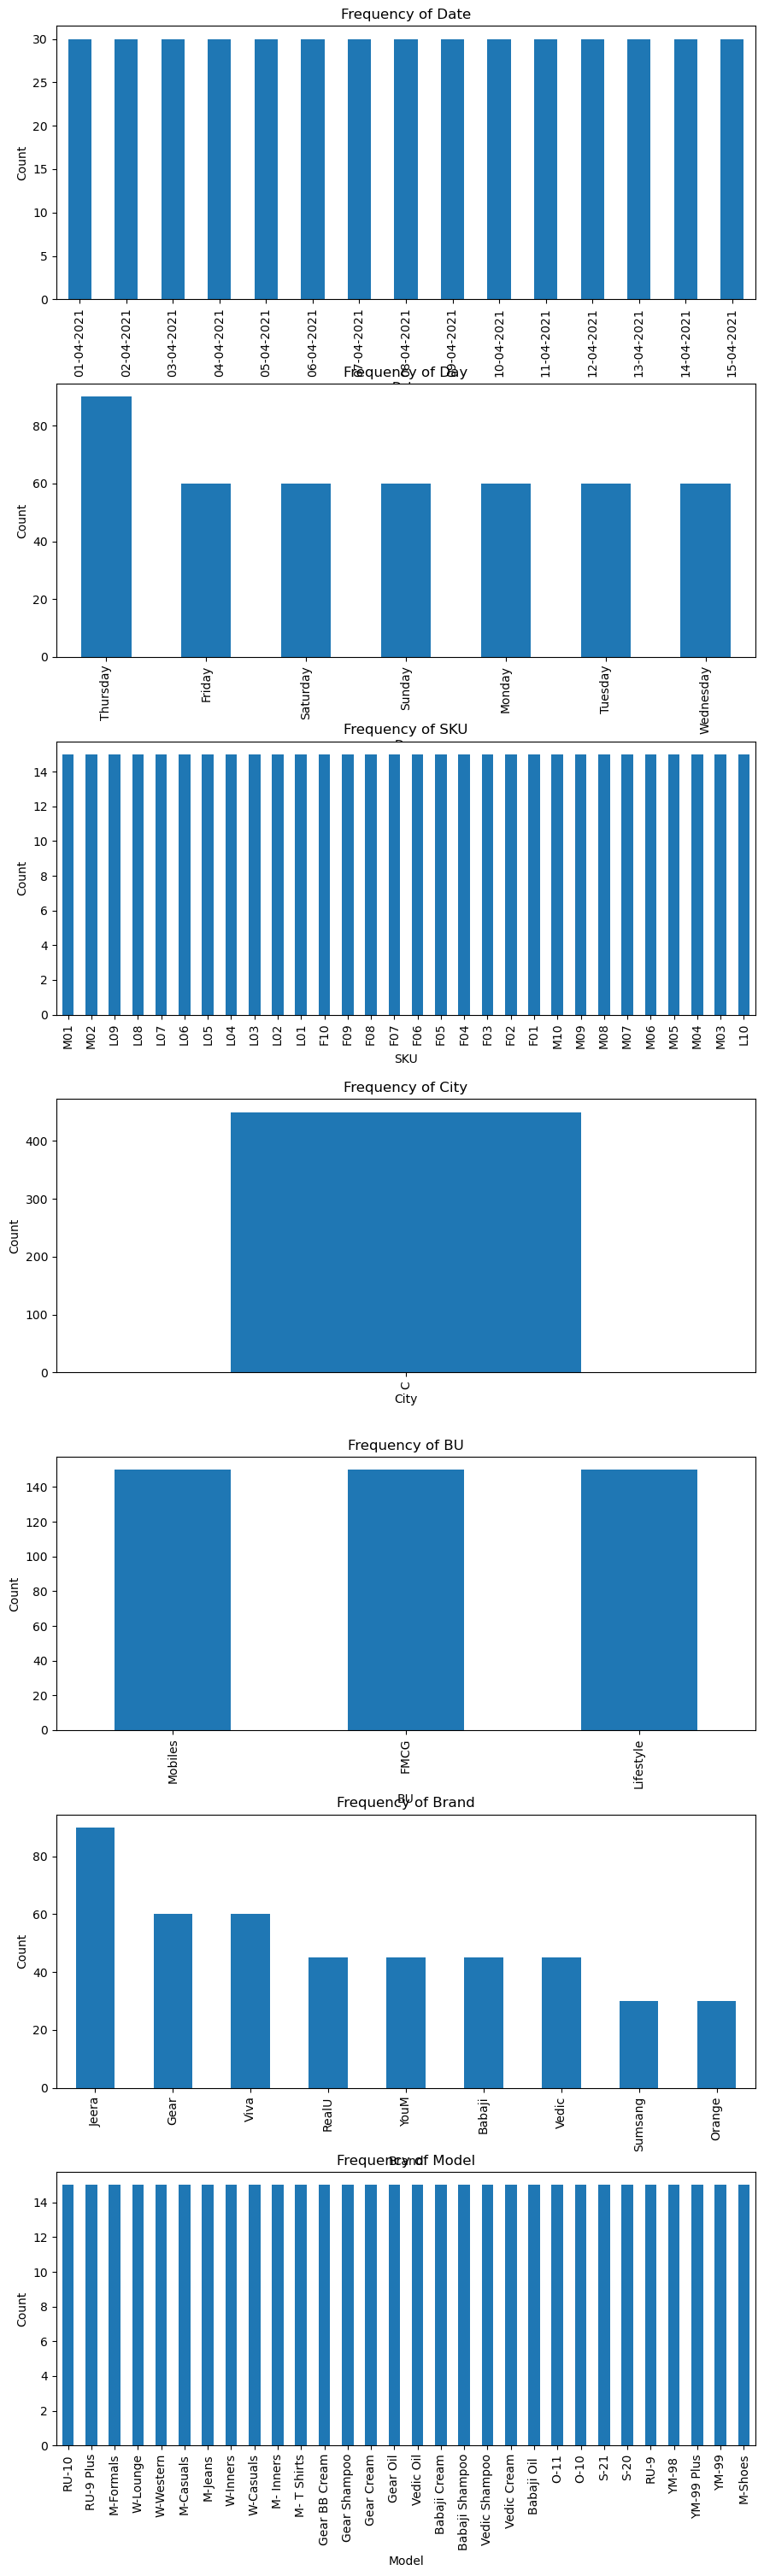

In [16]:
# Create bar charts for each categorical column
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 30))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Display the bar charts
plt.show()


In [17]:
# Calculate the mean and standard deviation for each numerical column
means = df[numerical_columns].mean()
std_devs = df[numerical_columns].std()

# Standardize the numerical columns
standardized_data = (df[numerical_columns] - means) / std_devs

# Display the standardized data
standardized_data.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342


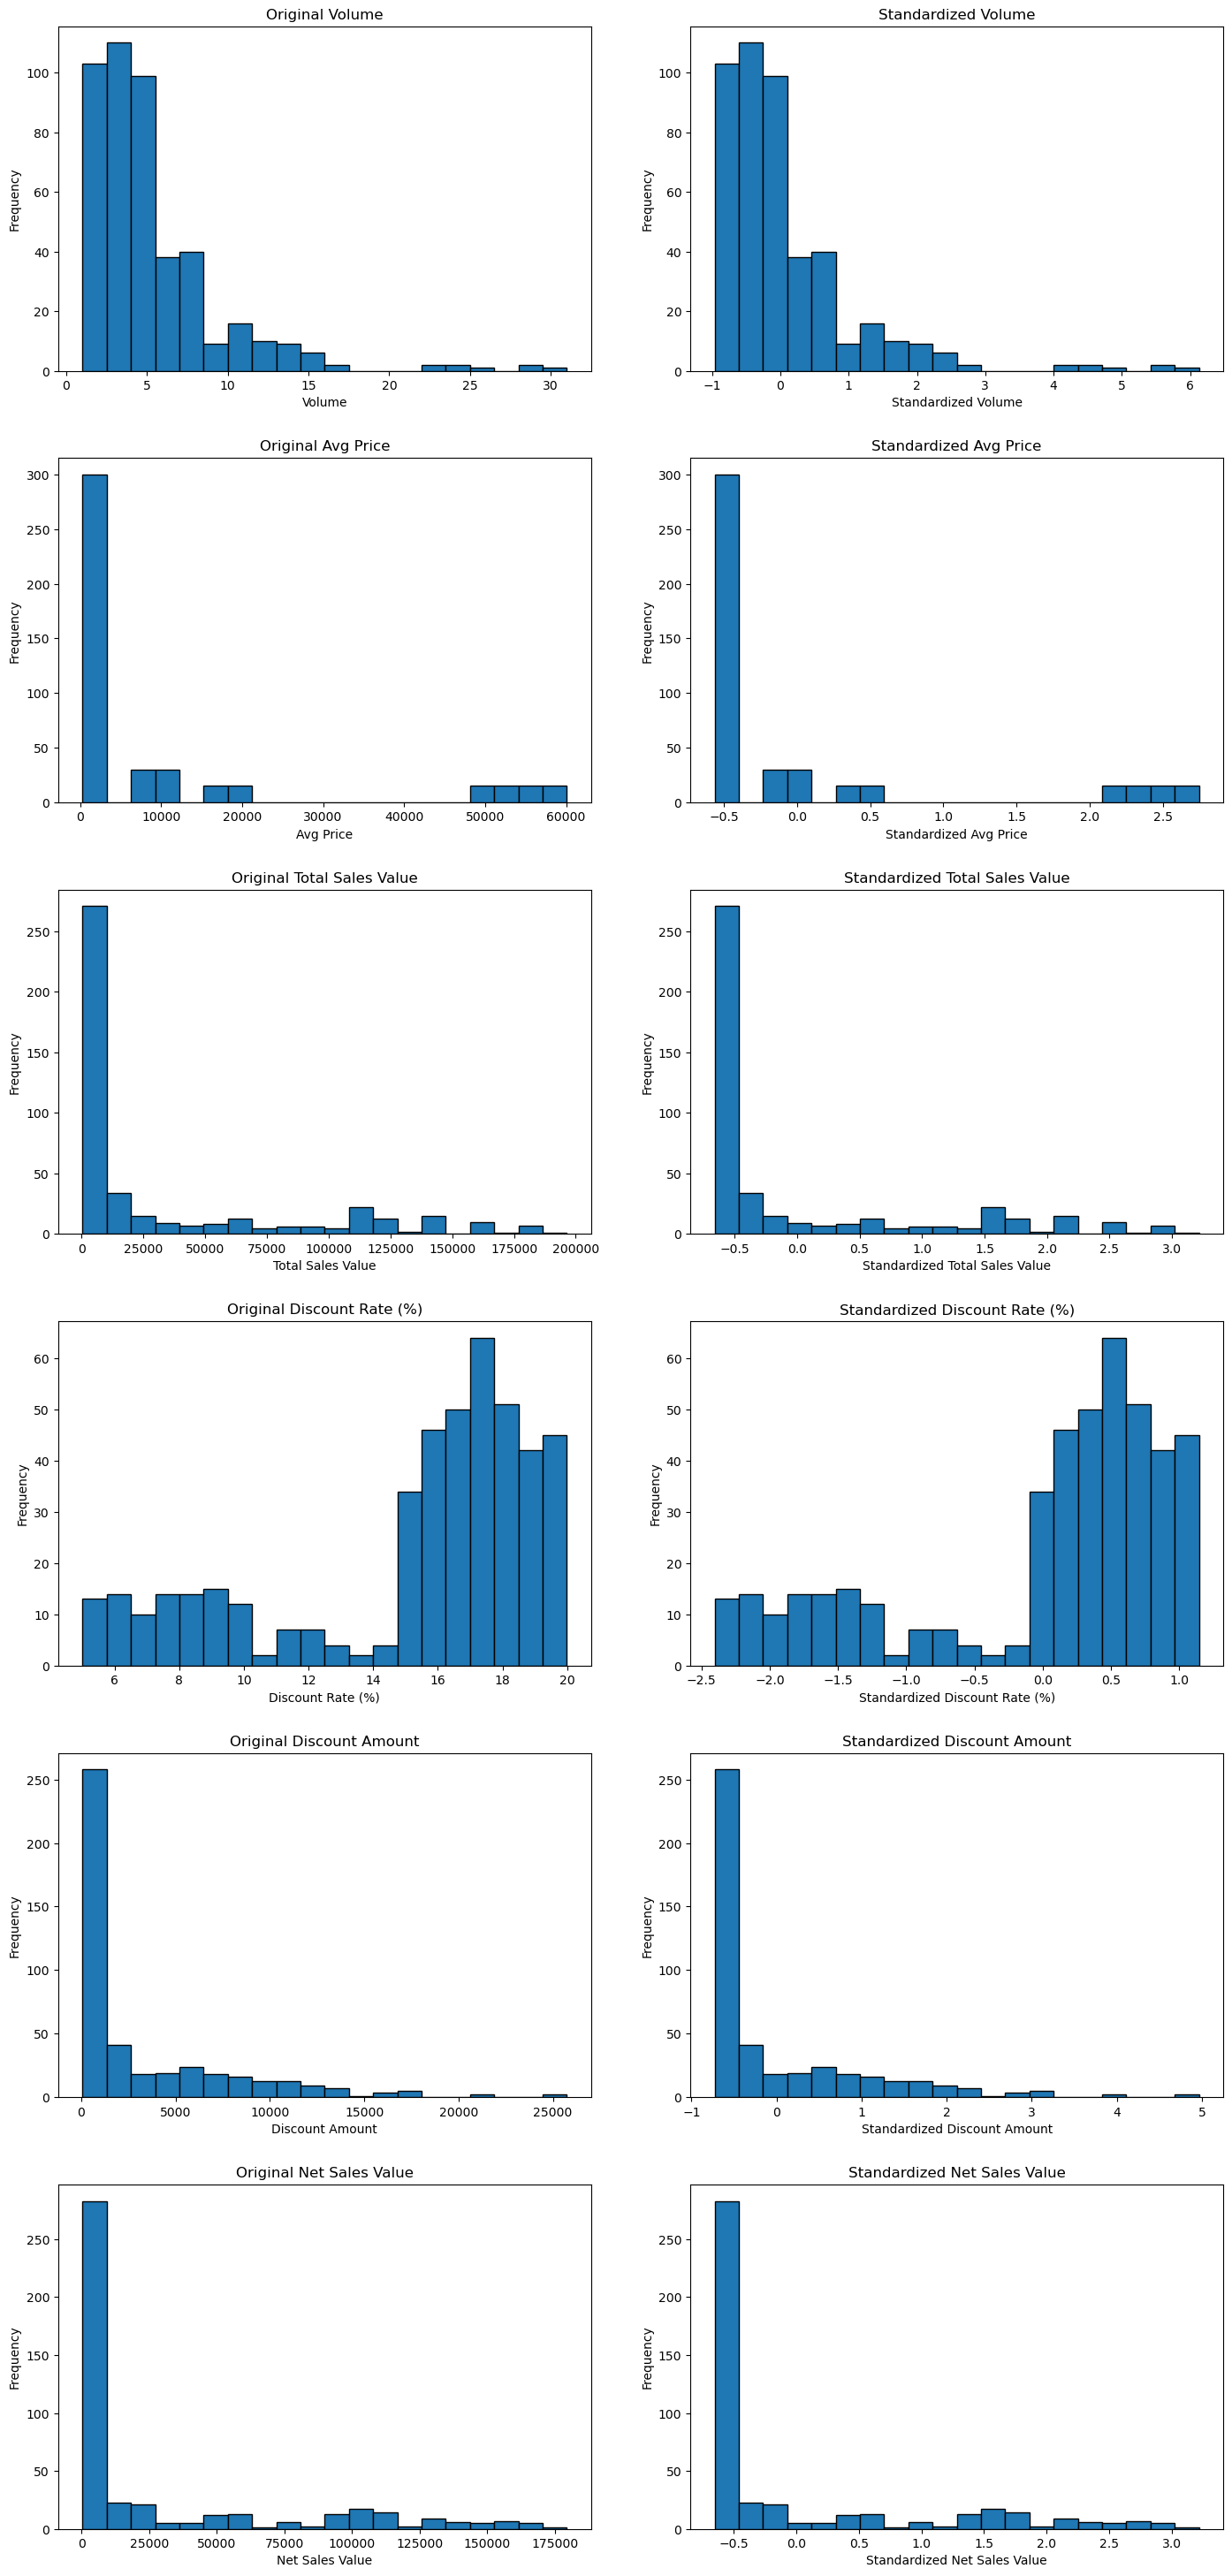

In [18]:
# Plot histograms for original and standardized data for comparison
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 30))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns):
    # Original data
    axes[i, 0].hist(df[column], bins=20, edgecolor='black')
    axes[i, 0].set_title(f'Original {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Standardized data
    axes[i, 1].hist(standardized_data[column], bins=20, edgecolor='black')
    axes[i, 1].set_title(f'Standardized {column}')
    axes[i, 1].set_xlabel(f'Standardized {column}')
    axes[i, 1].set_ylabel('Frequency')

# Display the plots
plt.show()
